#AI Homework 3: Introduction to Neural Networks

By:Nicholas Soucy
For: COS 570 F2021

###Imports

In [ ]:
#Imports

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import time

#Google drive stuff
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Part II: Simple Neural Networks

###Pima Dataset

####Load Dataset

In [ ]:
#Load dataset
dataset = loadtxt('drive/MyDrive/AI/Homework/HW3/pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

####Define Keras Model

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

####Compile Keras Model

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

####Fit Keras Model

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=2)

Epoch 1/150
77/77 - 1s - loss: 6.9741 - accuracy: 0.3828
Epoch 2/150
77/77 - 0s - loss: 0.8433 - accuracy: 0.5404
Epoch 3/150
77/77 - 0s - loss: 0.7791 - accuracy: 0.5768
Epoch 4/150
77/77 - 0s - loss: 0.7378 - accuracy: 0.6120
Epoch 5/150
77/77 - 0s - loss: 0.7195 - accuracy: 0.6107
Epoch 6/150
77/77 - 0s - loss: 0.6856 - accuracy: 0.6146
Epoch 7/150
77/77 - 0s - loss: 0.6735 - accuracy: 0.6328
Epoch 8/150
77/77 - 0s - loss: 0.6555 - accuracy: 0.6458
Epoch 9/150
77/77 - 0s - loss: 0.6430 - accuracy: 0.6523
Epoch 10/150
77/77 - 0s - loss: 0.6366 - accuracy: 0.6549
Epoch 11/150
77/77 - 0s - loss: 0.6205 - accuracy: 0.6589
Epoch 12/150
77/77 - 0s - loss: 0.6175 - accuracy: 0.6680
Epoch 13/150
77/77 - 0s - loss: 0.6209 - accuracy: 0.6823
Epoch 14/150
77/77 - 0s - loss: 0.6262 - accuracy: 0.6758
Epoch 15/150
77/77 - 0s - loss: 0.6410 - accuracy: 0.6641
Epoch 16/150
77/77 - 0s - loss: 0.6020 - accuracy: 0.6940
Epoch 17/150
77/77 - 0s - loss: 0.5893 - accuracy: 0.7031
Epoch 18/150
77/77 - 0s

####Fit Keras Model

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.7721
Accuracy: 77.21


###Clothing Dataset

####Import Dataset

In [ ]:
#Import Data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

####Preprocess the Data

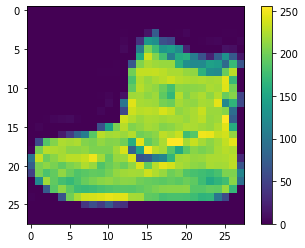

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Normalize Data 
train_images = train_images / 255.0
test_images = test_images / 255.0

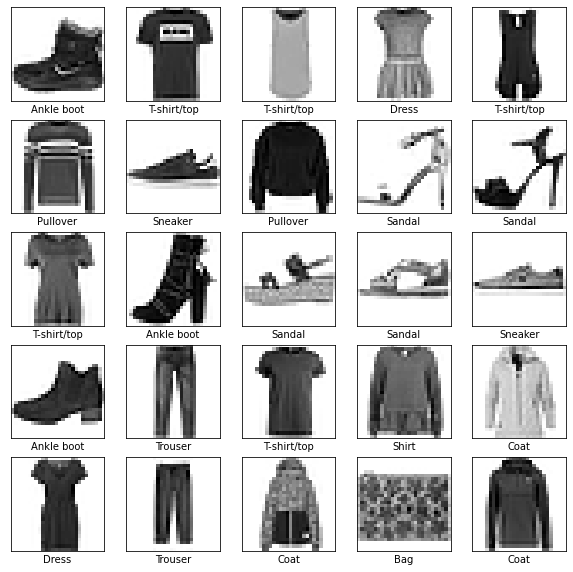

In [ ]:
#Show first 25 images of the training set
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

####Building the Model

In [ ]:
#Build Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

####Compile the Model

In [ ]:
#Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

####Train Model

In [ ]:
#Train Model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5058 - accuracy: 0.8226
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3778 - accuracy: 0.8621
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3379 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3143 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2978 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2811 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2702 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2587 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2486 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

####Evaluate Accuracy

In [ ]:
#Get Test accuracy
_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3355 - accuracy: 0.8820

Test accuracy: 0.8820000290870667


####Make Predictions

In [ ]:
#Convert Logits to probabilities via softmax

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)


In [ ]:
predictions[0]

array([6.4738373e-07, 6.9417909e-11, 2.5983191e-08, 4.2895903e-10,
       2.6679990e-07, 2.5840092e-03, 2.6139724e-06, 4.7195975e-02,
       1.1925507e-06, 9.5021516e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

####Verify Predictions

In [ ]:
#Look at full set of 10 class predictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

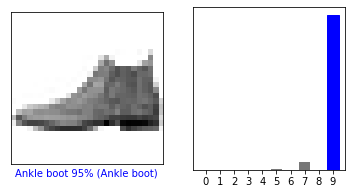

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

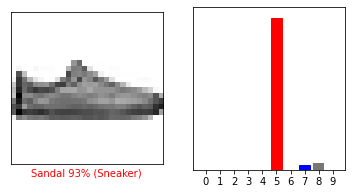

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

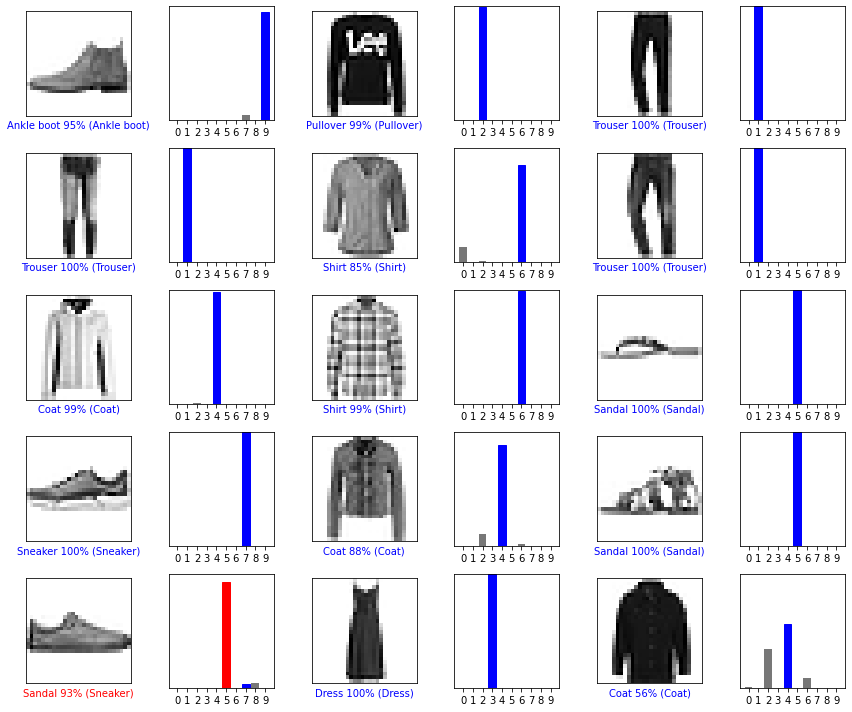

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

####Use the Trained Model

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.4273604e-04 1.1976657e-12 9.9347597e-01 2.3209221e-09 1.3951198e-03
  3.9729377e-15 4.9861604e-03 1.0780753e-14 3.3108974e-10 9.7903238e-17]]


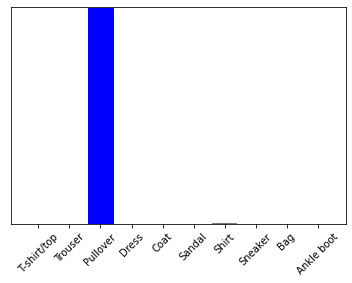

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2

##Part III: Custom Neural Networks

###Data Import

In [ ]:
#Load dataset
iris_train = loadtxt('drive/MyDrive/AI/Homework/HW3/iris_train.csv', delimiter=',')
iris_test = loadtxt('drive/MyDrive/AI/Homework/HW3/iris_train.csv', delimiter=',')

#get x train and test from csv
x_train = iris_train[:,0:4]
x_test = iris_test[:,0:4]

#get train and test labels from csv
temp_y_train = iris_train[:,4:]
temp_y_test = iris_test[:,4:]


#convert labels into single array
labels = ["Iris Setosa","Iris Versicolor","Iris Virginica"]

y_train = []
y_test = []

for i in temp_y_train:
  if i[0] == 1:
    y_train.append(0)
  elif i[1] == 1:
    y_train.append(1)
  elif i[2] == 1:
    y_train.append(2)

for j in temp_y_test:
  if j[0] == 1:
    y_test.append(0)
  elif j[1] == 1:
    y_test.append(1)
  elif j[2] == 1:
    y_test.append(2)


y_train = np.array(y_train)
y_test = np.array(y_test)

###Custom Neural Network I

####Build the Model

In [ ]:
#Build Model
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

####Compile the Model

In [ ]:
#Compile Model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####Train the Model

In [ ]:
tic = time.perf_counter()
hist1 = model1.fit(x_train, 
        y_train, 
        epochs = 75)
toc = time.perf_counter()
train_time_I = (toc - tic)

Epoch 1/75
5/5 [==============================] - 0s 5ms/step - loss: 1.5178 - accuracy: 0.3258
Epoch 2/75
5/5 [==============================] - 0s 4ms/step - loss: 1.2881 - accuracy: 0.3258
Epoch 3/75
5/5 [==============================] - 0s 4ms/step - loss: 1.1172 - accuracy: 0.3258
Epoch 4/75
5/5 [==============================] - 0s 5ms/step - loss: 1.0264 - accuracy: 0.3333
Epoch 5/75
5/5 [==============================] - 0s 7ms/step - loss: 0.9559 - accuracy: 0.4015
Epoch 6/75
5/5 [==============================] - 0s 5ms/step - loss: 0.9081 - accuracy: 0.7197
Epoch 7/75
5/5 [==============================] - 0s 4ms/step - loss: 0.8778 - accuracy: 0.7727
Epoch 8/75
5/5 [==============================] - 0s 5ms/step - loss: 0.8522 - accuracy: 0.7652
Epoch 9/75
5/5 [==============================] - 0s 6ms/step - loss: 0.8245 - accuracy: 0.7045
Epoch 10/75
5/5 [==============================] - 0s 4ms/step - loss: 0.7983 - accuracy: 0.6742
Epoch 11/75
5/5 [======================

####Plot Training and Testing loss

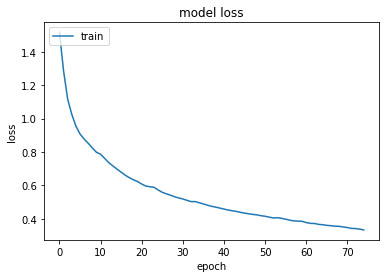

In [ ]:
plt.plot(hist1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Plot Accuracy


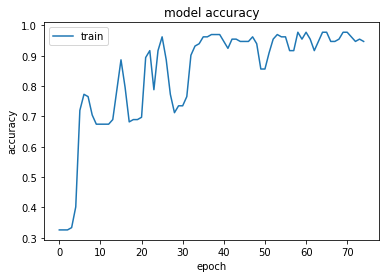

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Evaluate Accuracy

In [ ]:
#Get Test accuracy
_, test_acc_I = model1.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_I)


Test accuracy: 0.9469696879386902


####Predictions for each test sample

In [ ]:
p = model1.predict(x_test)
for k in p:
  print("Prediction = ",k) 

Prediction =  [0.9657372  0.03176115 0.00250162]
Prediction =  [0.00459311 0.2779266  0.71748036]
Prediction =  [0.03831202 0.61426026 0.34742776]
Prediction =  [0.003701  0.2879425 0.7083565]
Prediction =  [0.02091966 0.53892976 0.44015056]
Prediction =  [0.10029808 0.5909799  0.30872205]
Prediction =  [0.93672556 0.05816157 0.00511291]
Prediction =  [0.93978083 0.05589735 0.00432184]
Prediction =  [0.05513903 0.61485624 0.3300047 ]
Prediction =  [0.9357489  0.05834193 0.00590909]
Prediction =  [0.00148385 0.27441794 0.7240982 ]
Prediction =  [0.9524368  0.04370089 0.00386222]
Prediction =  [0.02795788 0.5997571  0.37228507]
Prediction =  [0.04434218 0.50303215 0.45262566]
Prediction =  [0.02326699 0.43656838 0.5401646 ]
Prediction =  [0.0109117 0.3984367 0.5906516]
Prediction =  [0.0112902  0.38669464 0.60201514]
Prediction =  [0.09170727 0.6004653  0.3078274 ]
Prediction =  [0.00320458 0.20027788 0.7965176 ]
Prediction =  [0.0330799 0.5303712 0.4365489]
Prediction =  [0.94790685 0.0

###Custom Neural Network II

####Build the Model

In [ ]:
#Build Model2
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

####Compile the Model

In [ ]:
#Compile Model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####Train the Model

In [ ]:
tic = time.perf_counter()
hist2 = model2.fit(x_train, 
        y_train, 
        epochs = 75)
toc = time.perf_counter()
train_time_II = (toc - tic)

Epoch 1/75
5/5 [==============================] - 1s 6ms/step - loss: 1.1160 - accuracy: 0.2273
Epoch 2/75
5/5 [==============================] - 0s 6ms/step - loss: 1.0592 - accuracy: 0.3182
Epoch 3/75
5/5 [==============================] - 0s 6ms/step - loss: 1.0200 - accuracy: 0.3258
Epoch 4/75
5/5 [==============================] - 0s 8ms/step - loss: 0.9647 - accuracy: 0.5985
Epoch 5/75
5/5 [==============================] - 0s 5ms/step - loss: 0.8938 - accuracy: 0.6742
Epoch 6/75
5/5 [==============================] - 0s 5ms/step - loss: 0.7970 - accuracy: 0.6742
Epoch 7/75
5/5 [==============================] - 0s 6ms/step - loss: 0.7078 - accuracy: 0.6742
Epoch 8/75
5/5 [==============================] - 0s 11ms/step - loss: 0.5929 - accuracy: 0.6742
Epoch 9/75
5/5 [==============================] - 0s 5ms/step - loss: 0.5051 - accuracy: 0.6742
Epoch 10/75
5/5 [==============================] - 0s 6ms/step - loss: 0.4365 - accuracy: 0.8561
Epoch 11/75
5/5 [=====================

####Plot Training and Testing loss

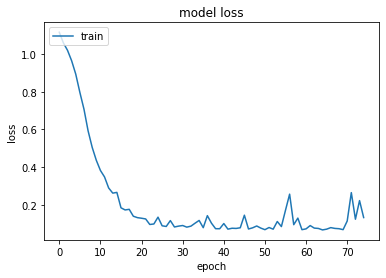

In [ ]:
plt.plot(hist2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Plot Accuracy

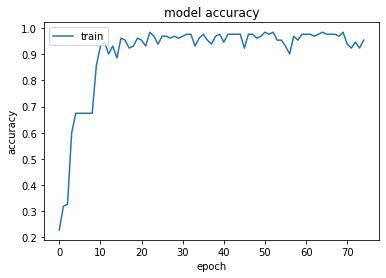

In [ ]:
plt.plot(hist2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Evaluate Accuracy

In [ ]:
#Get Test accuracy
_, test_acc_II = model2.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_II)


Test accuracy: 0.9621211886405945


####Predictions for each test sample

In [ ]:
p = model1.predict(x_test)
for k in p:
  print("Prediction = ",k) 

Prediction =  [0.9657372  0.03176115 0.00250162]
Prediction =  [0.00459311 0.2779266  0.71748036]
Prediction =  [0.03831202 0.61426026 0.34742776]
Prediction =  [0.003701  0.2879425 0.7083565]
Prediction =  [0.02091966 0.53892976 0.44015056]
Prediction =  [0.10029808 0.5909799  0.30872205]
Prediction =  [0.93672556 0.05816157 0.00511291]
Prediction =  [0.93978083 0.05589735 0.00432184]
Prediction =  [0.05513903 0.61485624 0.3300047 ]
Prediction =  [0.9357489  0.05834193 0.00590909]
Prediction =  [0.00148385 0.27441794 0.7240982 ]
Prediction =  [0.9524368  0.04370089 0.00386222]
Prediction =  [0.02795788 0.5997571  0.37228507]
Prediction =  [0.04434218 0.50303215 0.45262566]
Prediction =  [0.02326699 0.43656838 0.5401646 ]
Prediction =  [0.0109117 0.3984367 0.5906516]
Prediction =  [0.0112902  0.38669464 0.60201514]
Prediction =  [0.09170727 0.6004653  0.3078274 ]
Prediction =  [0.00320458 0.20027788 0.7965176 ]
Prediction =  [0.0330799 0.5303712 0.4365489]
Prediction =  [0.94790685 0.0

###Custom Neural Network III

####Build the Model

In [ ]:
#Build Model3
model3 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

####Compile the Model

In [ ]:
#Compile Model
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####Train the Model

In [ ]:
tic = time.perf_counter()
hist3 = model3.fit(x_train, 
        y_train, 
        epochs = 75)
toc = time.perf_counter()
train_time_III = (toc - tic)

Epoch 1/75
5/5 [==============================] - 0s 5ms/step - loss: 3.3586 - accuracy: 0.3258
Epoch 2/75
5/5 [==============================] - 0s 4ms/step - loss: 3.1789 - accuracy: 0.3258
Epoch 3/75
5/5 [==============================] - 0s 5ms/step - loss: 2.9873 - accuracy: 0.3258
Epoch 4/75
5/5 [==============================] - 0s 4ms/step - loss: 2.8200 - accuracy: 0.3258
Epoch 5/75
5/5 [==============================] - 0s 6ms/step - loss: 2.6443 - accuracy: 0.3258
Epoch 6/75
5/5 [==============================] - 0s 4ms/step - loss: 2.4876 - accuracy: 0.3258
Epoch 7/75
5/5 [==============================] - 0s 4ms/step - loss: 2.3368 - accuracy: 0.3258
Epoch 8/75
5/5 [==============================] - 0s 5ms/step - loss: 2.1884 - accuracy: 0.3258
Epoch 9/75
5/5 [==============================] - 0s 6ms/step - loss: 2.0537 - accuracy: 0.3258
Epoch 10/75
5/5 [==============================] - 0s 7ms/step - loss: 1.9159 - accuracy: 0.3258
Epoch 11/75
5/5 [======================

####Plot Training and Testing loss

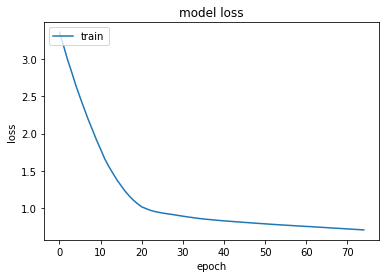

In [ ]:
plt.plot(hist3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Plot Accuracy

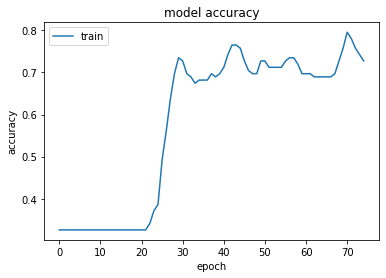

In [ ]:
plt.plot(hist3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Evaluate Accuracy

In [ ]:
#Get Test accuracy
_, test_acc_III = model3.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_III)


Test accuracy: 0.7121211886405945


####Predictions for each test sample

In [ ]:
p = model3.predict(x_test)
for k in p:
  print("Prediction = ",k) 

Prediction =  [0.52328795 0.2598212  0.21689086]
Prediction =  [0.06307939 0.34441313 0.5925075 ]
Prediction =  [0.1006899  0.43958002 0.45973006]
Prediction =  [0.0555259  0.34033042 0.6041437 ]
Prediction =  [0.08128295 0.43832967 0.48038733]
Prediction =  [0.17429125 0.38553512 0.4401737 ]
Prediction =  [0.48614523 0.29165608 0.2221987 ]
Prediction =  [0.4906402  0.29403046 0.21532933]
Prediction =  [0.11896188 0.42689043 0.45414773]
Prediction =  [0.528859   0.23882598 0.23231502]
Prediction =  [0.034788   0.43461737 0.53059465]
Prediction =  [0.5190443  0.25917596 0.22177973]
Prediction =  [0.09266116 0.4542238  0.45311505]
Prediction =  [0.13662039 0.352571   0.5108086 ]
Prediction =  [0.12406337 0.32865977 0.54727685]
Prediction =  [0.07117592 0.38344303 0.54538107]
Prediction =  [0.08027405 0.35672113 0.56300485]
Prediction =  [0.16029912 0.40517443 0.43452635]
Prediction =  [0.05153112 0.2955101  0.6529588 ]
Prediction =  [0.11880092 0.3903828  0.4908163 ]
Prediction =  [0.484

##Anaylsis

####Tutorials Discussion

The first tutorial was very interesting due to the dataset itself. I have never had a dataset that had binary labels, they either have diabeties or do not. I always use datasets with multiple classes. It was nice to see how a dataset like this is just a two class dataset. 

As for the second dataset, it was more like I was used to, larger and more classes. 

For the first tutorial, the accuracy was quite low at 77%, but the training time was exponentially faster even though we ran it for significantly more epochs (150) versus the second tutorial (10). I suspect this is due to a larger number of parameters for the second model, but this does not explain the disparity in training time or accuracy.

The difference in training time and accruacy appear to be due to the sample size of each dataset. 

First tutorial Pima dataset sample size:

In [ ]:
X.shape[0]

768

Second tutorial Clothing dataset sample size:

In [ ]:
train_images.shape[0]

60000

Therefore, the training time was much larger on the dataset with more samples because it was training on exponential more samples. This accounts for the exponential increase in time. 

In addition, we can expect higher network accuracy when we have more samples to work with as our network is more specilized in decerning the differences between classes given the avaliable information.

####Custom Neural Networks Discussion

I decided to create three neural networks to compare the difference between number of layers and number of nodes per layer. The three summaries of each network is shown below.

In [ ]:
model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_46 (Dense)             (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_48 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_51 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_52 (Dense)             (None, 3)                 387       
Total params: 13,571
Trainable params: 13,571
Non-trainable params: 0
_________________________________________________

In [ ]:
model3.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_54 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


As you can see, Model 3 has only one layer and with the least amount of nodes in the layer. Therefore, my hypothesis is that model 3 would have the smallest training time and accuracy (if number of epochs is held constant). The smaller amount of parameters (131) indicates a shorter training time and decreased accuracy when compared to more parameters. 

Model 1 is in between Models 1 & 2. It still has only one layer, but with 64 nodes and 515 parameters compared to the 16 and 131 in Model 3. Therefore I expect Model 1 to have increased training time and accuracy when compared to Model 3

Model 2 is the more complex network. This time we add more layers and more nodes. We 5 layers compared to the 1 layer from Models 1 & 3. We also have exponentially more parameters at 13,571. I expect Model 2 to have the highest training time and accuracy.

For each of the models, we train for 75 epochs. This way, we can compare the training times and accuracies directly because the amount of training iterations are the same. 

For Model 1 we have the following results:

In [ ]:
print(train_time_I)
print(test_acc_I)

3.161284452999098
0.9469696879386902


For Model 2 we have the following results:

In [ ]:
print(train_time_II)
print(test_acc_II)

3.544683170999633
0.9621211886405945


For Model 3 we have the following results:

In [ ]:
print(train_time_III)
print(test_acc_III)

3.0956620759989164
0.7121211886405945


Now lets see these results next to each other by making two plots.

Training Time:

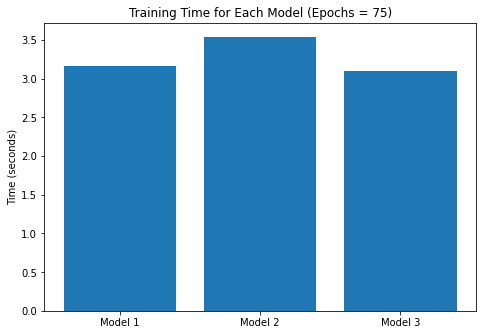

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Model 1','Model 2','Model 3']
y = [train_time_I,train_time_II,train_time_III]
ax.bar(x,y)
plt.ylabel("Time (seconds)")
plt.title("Training Time for Each Model (Epochs = 75)")
plt.show()

Accuracy

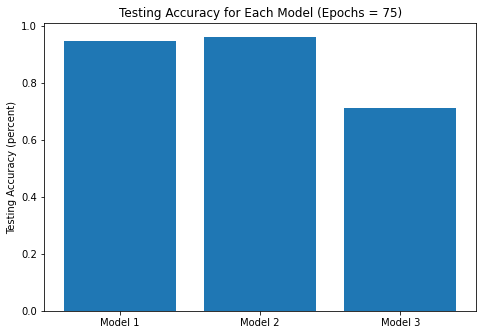

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Model 1','Model 2','Model 3']
y = [test_acc_I,test_acc_II,test_acc_III]
ax.bar(x,y)
plt.ylabel("Testing Accuracy (percent)")
plt.title("Testing Accuracy for Each Model (Epochs = 75)")
plt.show()

Due to the simplicity of the dataset, the difference between the models in terms of accuracy and training time are quite small. We only have 136 samples for training and testing each and the difference in each class (Iris Types) are quite clear. Therefore, it is recommended to use more simplistic networks as they will be able to have competitive accuracies with smaller training times.

With that being said, our hypothesises were correct. Model 3 had the smallest amount of parameters and had the smallest training time and accuracy. Model 1 was right in between Models 2 & 3 as predicted, and Model 2 had the highest training time and accuracy. Therefore, it appears that training time and accuracy is directly related to the number of parameters. However, you can tune the number of epochs to save on running time with more complex networks most of the time without sacrificing too much accuracy. 